In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist, fashion_mnist
import matplotlib.pyplot as plt


In [40]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [41]:
input_dim = x_train.shape[1]
encoding_dim = 64  

input_layer = Input(shape=(input_dim,))

encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)

In [42]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3217 - val_loss: 0.1412
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1320 - val_loss: 0.1100
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1085 - val_loss: 0.1008
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1003 - val_loss: 0.0954
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0960 - val_loss: 0.0925
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0927 - val_loss: 0.0901
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0903 - val_loss: 0.0885
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0884 - val_loss: 0.0863
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0864 - val_loss: 0.0853
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0853 - val_loss: 0.0834
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0840 - val_loss: 0.0824
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [43]:
decoded_imgs = autoencoder.predict(x_test)

mse = np.mean(np.power(x_test - decoded_imgs, 2), axis=1)

threshold = np.percentile(mse, 95)  

anomalies = mse > threshold

print(f"Threshold: {threshold}")
print(f"Detected anomalies: {np.sum(anomalies)} out of {len(mse)}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step
Threshold: 0.008569706976413724
Detected anomalies: 500 out of 10000


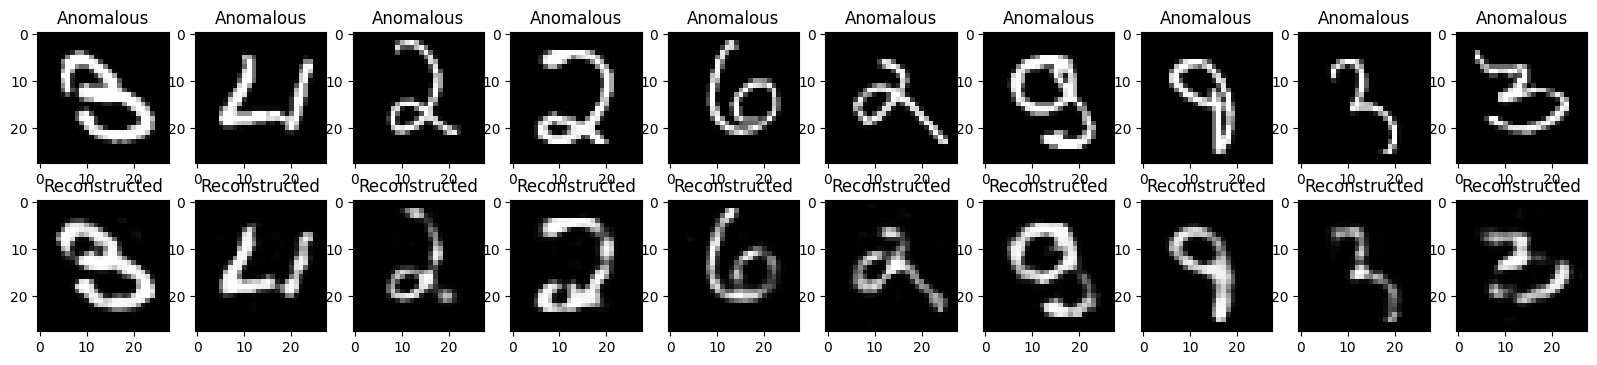

In [44]:
anomalous_images = x_test[anomalies]
reconstructed_images = decoded_imgs[anomalies]

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(anomalous_images[i].reshape(28, 28))
    plt.title("Anomalous")
    plt.gray()
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.title("Reconstructed")
    plt.gray()
plt.show()


In [45]:
(fashion_x_train, _), (fashion_x_test, _) = fashion_mnist.load_data()

fashion_x_train = fashion_x_train.astype('float32') / 255.0
fashion_x_test = fashion_x_test.astype('float32') / 255.0

fashion_x_train = fashion_x_train.reshape((len(fashion_x_train), np.prod(fashion_x_train.shape[1:])))
fashion_x_test = fashion_x_test.reshape((len(fashion_x_test), np.prod(fashion_x_test.shape[1:])))


In [46]:
fashion_decoded_imgs = autoencoder.predict(fashion_x_test)

fashion_mse = np.mean(np.power(fashion_x_test - fashion_decoded_imgs, 2), axis=1)

mnist_decoded_imgs = autoencoder.predict(x_train)
mnist_mse = np.mean(np.power(x_train - mnist_decoded_imgs, 2), axis=1)
threshold = np.percentile(mnist_mse, 95)  

fashion_anomalies = fashion_mse > threshold

print(f"Threshold: {threshold}")
print(f"Detected anomalies in Fashion MNIST: {np.sum(fashion_anomalies)} out of {len(fashion_mse)}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step
Threshold: 0.008654693281278013
Detected anomalies in Fashion MNIST: 9989 out of 10000


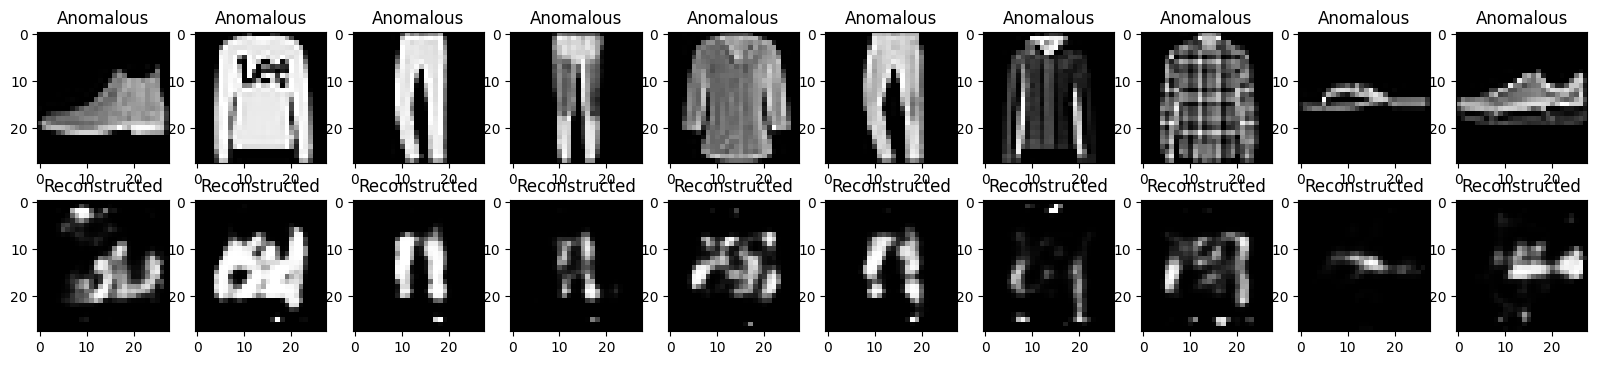

In [47]:
anomalous_fashion_images = fashion_x_test[fashion_anomalies]
reconstructed_fashion_images = fashion_decoded_imgs[fashion_anomalies]

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(anomalous_fashion_images[i].reshape(28, 28))
    plt.title("Anomalous")
    plt.gray()
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_fashion_images[i].reshape(28, 28))
    plt.title("Reconstructed")
    plt.gray()
plt.show()
